# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data_df = pd.read_csv(f'Worldometer-data-preprocessed/table_18-04-2022_preprocessed.csv')
data_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe


In [3]:
week_df = pd.read_csv(f'Worldometer-data-preprocessed/data_1_week.csv')
week_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,day
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,18-04-2022
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,18-04-2022
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,18-04-2022
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,18-04-2022
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,18-04-2022


# Trực quan các mối quan hệ giữa các trường dữ liệu

## 1. Một trường đơn

### a) Total Cases

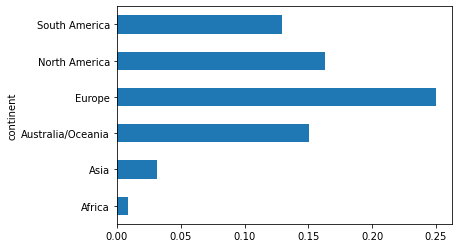

In [4]:
tcdf = data_df.groupby('continent')[['Total Cases', 'Population']].sum()
tcdf['Total Cases'] = tcdf['Total Cases']/tcdf['Population']
tcdf['Total Cases'].plot.barh();

Nhận xét: tổng số ca nhiễm ở châu Âu nhiều nhất

### b) Total Deaths

In [5]:
df = week_df.groupby(['continent', 'day'])[['Total Deaths']].sum()
df = df.reset_index()
df.head()

,continent,day,Total Deaths
0,Africa,18-04-2022,253519.0
1,Africa,19-04-2022,253559.0
2,Africa,20-04-2022,253596.0
3,Africa,21-04-2022,253667.0
4,Africa,22-04-2022,253681.0


In [ ]:
plt.figure(figsize=(13, 17))

ax = plt.subplot(4,2,(1,2))
sns.lineplot(data=df, x='day', y='Total Deaths', hue='continent', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_xlabel('')


for i, continent in enumerate(df['continent'].unique(), 3):
    continent_df = df.loc[df['continent'] == continent, 'Total Deaths']
    ax = plt.subplot(4,2,i)

    continent_df = df.loc[df['continent'] == continent, ['day', 'Total Deaths']].set_index('day')
    continent_df.plot.line(ax=ax, legend=None, title=continent, ylabel='Total Deaths', xlabel='')
    # rút gọn xtick từ dd-mm-yyy về dd-mm
    xticks = ax.get_xticks() # [-1, 0, 1,...]
    trunc_labels = [d[0:5] for d in continent_df.index]
    plt.xticks(xticks[1:], trunc_labels);

Nhận xét: Tổng người chết (`Total Deaths`) của mỗi châu lục trong 1 tuần từ 18/4/2022 tới 25/4/2022 không có sự thay đổi rõ rệt, gần như chỉ tăng 1 lượng ít

### c) New Cases, New Deaths, New Recovered
- Ta sẽ xem xét 3 cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [8]:
# data 18-04
df = data_df.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df['day'] = 18

# data 25-04
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df_25 = df_25.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df_25['day'] = 25

df = pd.concat([df, df_25], axis=0)
df.head()

,continent,New Cases,New Deaths,New Recovered,day
0,Africa,1139.0,39.0,820.0,18
1,Asia,147568.0,490.0,128362.0,18
2,Australia/Oceania,40610.0,19.0,56266.0,18
3,Europe,120322.0,693.0,730283.0,18
4,North America,35540.0,143.0,49775.0,18


- Góc nhìn từ slope graph

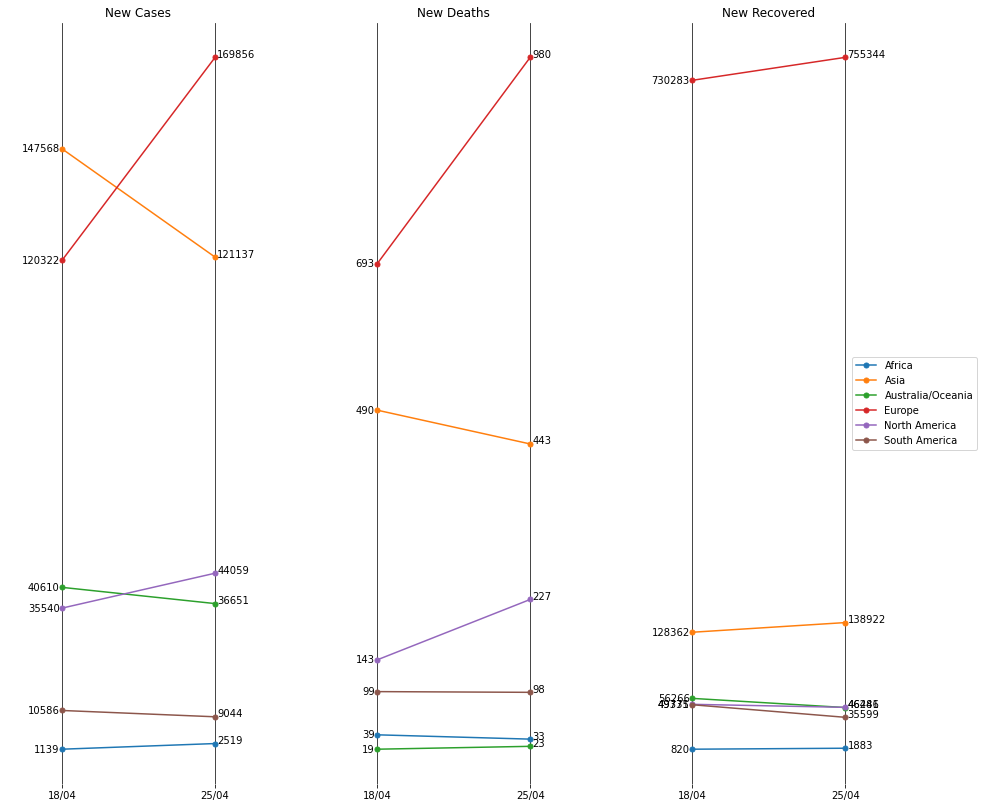

In [9]:
cols = ['New Cases', 'New Deaths', 'New Recovered']
continents = df['continent'].unique()
plt.figure(figsize=(16, 14))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(1,3,i)
    for continent in continents:
        temp = df[df['continent'] == continent]
        plt.plot(temp['day'], temp[col], marker='o', markersize=5)
        plt.text(temp['day'].values[1]+0.1, temp[col].values[1], int(temp[col].values[1]))
        plt.text(temp['day'].values[0]-0.1, temp[col].values[0], int(temp[col].values[0]), va='center', ha='right')

    # x limits, x ticks
    plt.xlim(15.5, 27.5)
    plt.xticks([18, 25], ['18/04', '25/04'])

    # get y ticks, replace 1,000 with k, and draw the ticks
    yticks = plt.yticks()[0]
    plt.yticks([])

    # title
    plt.title(col)

    # grid
    ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)

    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if i==3:
        plt.legend(continents, loc='center left', bbox_to_anchor=(0.8, 0.5));

Nhận xét: 
- `New Cases`:
- `New Deaths`
- `New Recovered`

- Góc nhìn từ area plot:

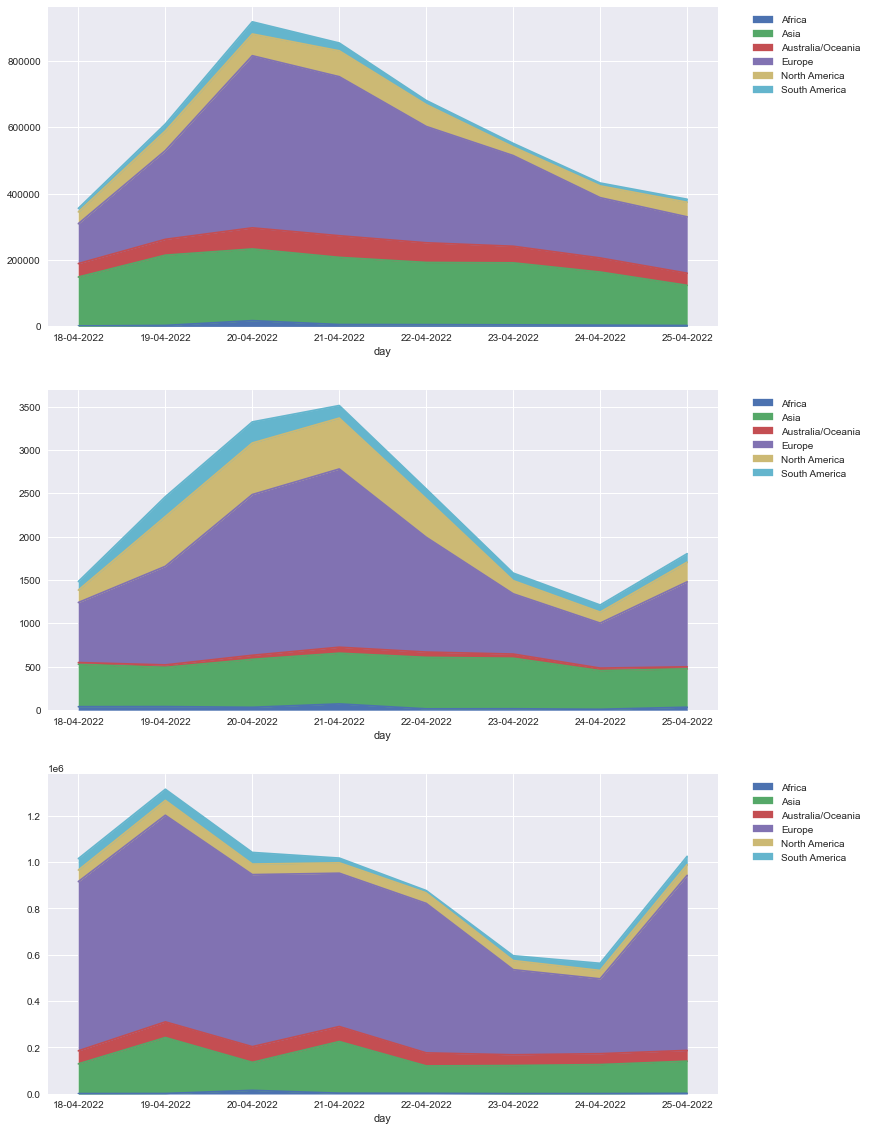

In [10]:
## AREA PLOT: 3 subplot (mỗi cái đại diện cho 1 cột new/subplot, mỗi subplot chứa 7 đường tương ứng 7 châu) ##
plt.style.use('seaborn')
df = week_df.groupby(['continent', 'day'])[['New Cases', 'New Deaths', 'New Recovered']].agg(sum)

for i, col in enumerate(['New Cases', 'New Deaths', 'New Recovered'], 1):
  ax = plt.subplot(3,1,i)
  df_col = df[[col]].reset_index(0)
  df_col = df_col.pivot_table(values=col, index=df_col.index, columns='continent')
  df_col.plot.area(stacked=True, ax=ax, figsize=(12,20));
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Nhận xét: ...

### d) New Deaths
- Ta sẽ xem xét cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [11]:
world_df = week_df.groupby(['day'])['New Deaths'].agg(sum)
world_df = world_df.reset_index()

world_df.head()

,day,New Deaths
0,18-04-2022,1483.0
1,19-04-2022,2461.0
2,20-04-2022,3324.0
3,21-04-2022,3513.0
4,22-04-2022,2551.0


In [12]:
world_new_death_mean = world_df['New Deaths'].mean()

world_df['Status'] = world_df['New Deaths'].apply(lambda x: 'Extreme' if x > world_new_death_mean else 'Normal')

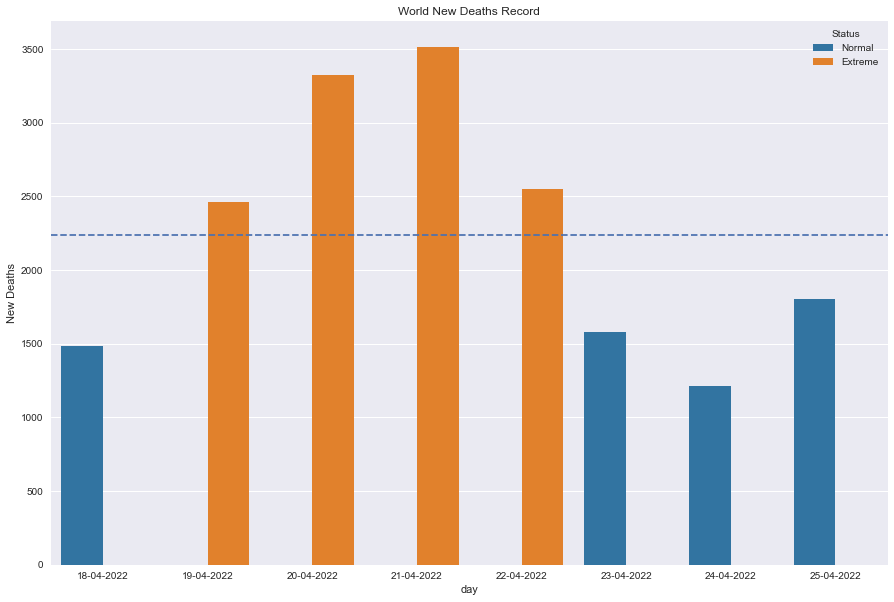

In [13]:
plt.figure(figsize=(15, 10))

sns.barplot(x='day', y='New Deaths', data=world_df, hue='Status', palette='tab10')

plt.axhline(world_new_death_mean,ls='--');
plt.title('World New Deaths Record');

Trong 3 ngày 19/04/2022 $\to$ 21/04/2022, số lượng ca tử vong mới tăng nhiều hơn hẳn các ngày còn lại.<br>
Tiến hành xem kỹ hơn số liệu của 3 ngày này.

In [45]:
df = week_df.groupby(['continent', 'day'])['New Deaths'].agg(sum)
df = df.reset_index()
df.head()

,continent,day,New Deaths
0,Africa,18-04-2022,39.0
1,Africa,19-04-2022,40.0
2,Africa,20-04-2022,32.0
3,Africa,21-04-2022,71.0
4,Africa,22-04-2022,14.0


In [46]:
df = df[df['day'].isin(['19-04-2022', '20-04-2022', '21-04-2022'])]
df.head()

,continent,day,New Deaths
1,Africa,19-04-2022,40.0
2,Africa,20-04-2022,32.0
3,Africa,21-04-2022,71.0
9,Asia,19-04-2022,453.0
10,Asia,20-04-2022,553.0


Xét ngày 19-04-2022

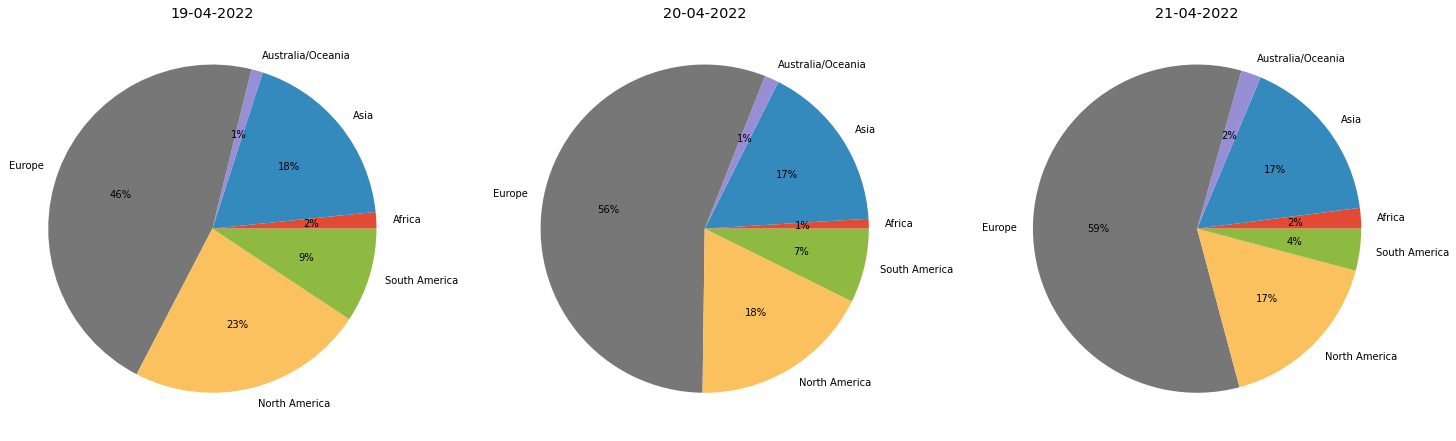

In [50]:
plt.figure(figsize=(25, 18))
plt.style.use('ggplot')

for i, d in enumerate(['19-04-2022', '20-04-2022', '21-04-2022']):
    plt.subplot(1, 3, i + 1)

    new_df = df[df['day'] == d]

    plt.pie(x=new_df['New Deaths'], labels=new_df['continent'], autopct='%.0f%%');
    plt.title(d)

Nhận xét: ....<br>

Có quan hệ nhân quả nào ở đây không?

## 2. Nhiều trường

### Total Deaths ~ Total Recovered

In [51]:
df = data_df[['Country', 'Total Recovered', 'Total Deaths']].set_index('Country')
df['Total Deaths'] = df['Total Deaths']
df.head()

,Total Recovered,Total Deaths
Country,,
China,151407.0,4641.0
USA,80244093.0,1015821.0
India,42511701.0,521996.0
Brazil,29262483.0,662076.0
France,25132351.0,144205.0


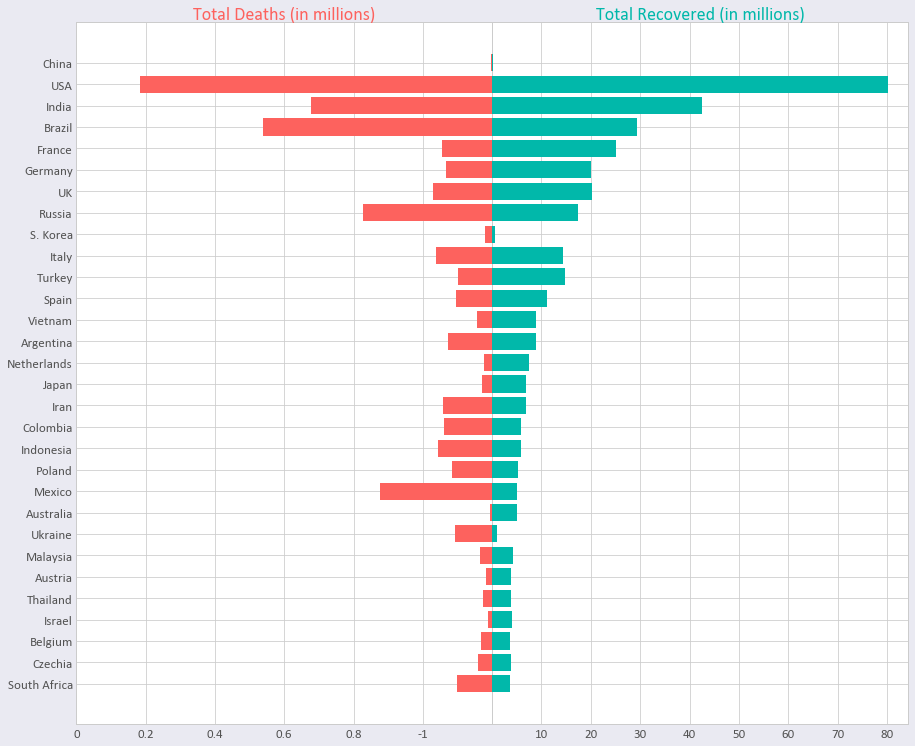

In [52]:
plt.style.use('seaborn-whitegrid') # fast
_df = df.iloc[:30]
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = _df.index
fig, axes = plt.subplots(figsize=(15,13), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout() #adjusts subplot params so that subplots are nicely fit in the figure.

axes[0].barh(index, _df['Total Deaths'], align='center', color=color_red, zorder=10)
axes[0].set_title('Total Deaths (in millions)', fontsize=18, pad=2, color=color_red, **hfont)
axes[1].barh(index, _df['Total Recovered'], align='center', color=color_blue, zorder=10)
axes[1].set_title('Total Recovered (in millions)', fontsize=18, pad=2, color=color_blue, **hfont)
axes[0].invert_xaxis()
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

# thay đổi xticks labels
axes[1].set_xticks(np.array([10, 20, 30, 40, 50, 60, 70, 80])*1e6)
axes[1].yaxis.set_tick_params(size=0)
axes[1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80])

# thay đổi xticks labels
axes[0].set_xticks(axes[0].get_xticks()[1:])
axes[0].set_xticklabels([-1, 0.8, 0.6, 0.4, 0.2, 0])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)    

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95) #wspace=0 for no gap between the two axes

Nhận xét: ...

### Population ~ Total Recovered ~ Total Deaths

<AxesSubplot:ylabel='Country'>

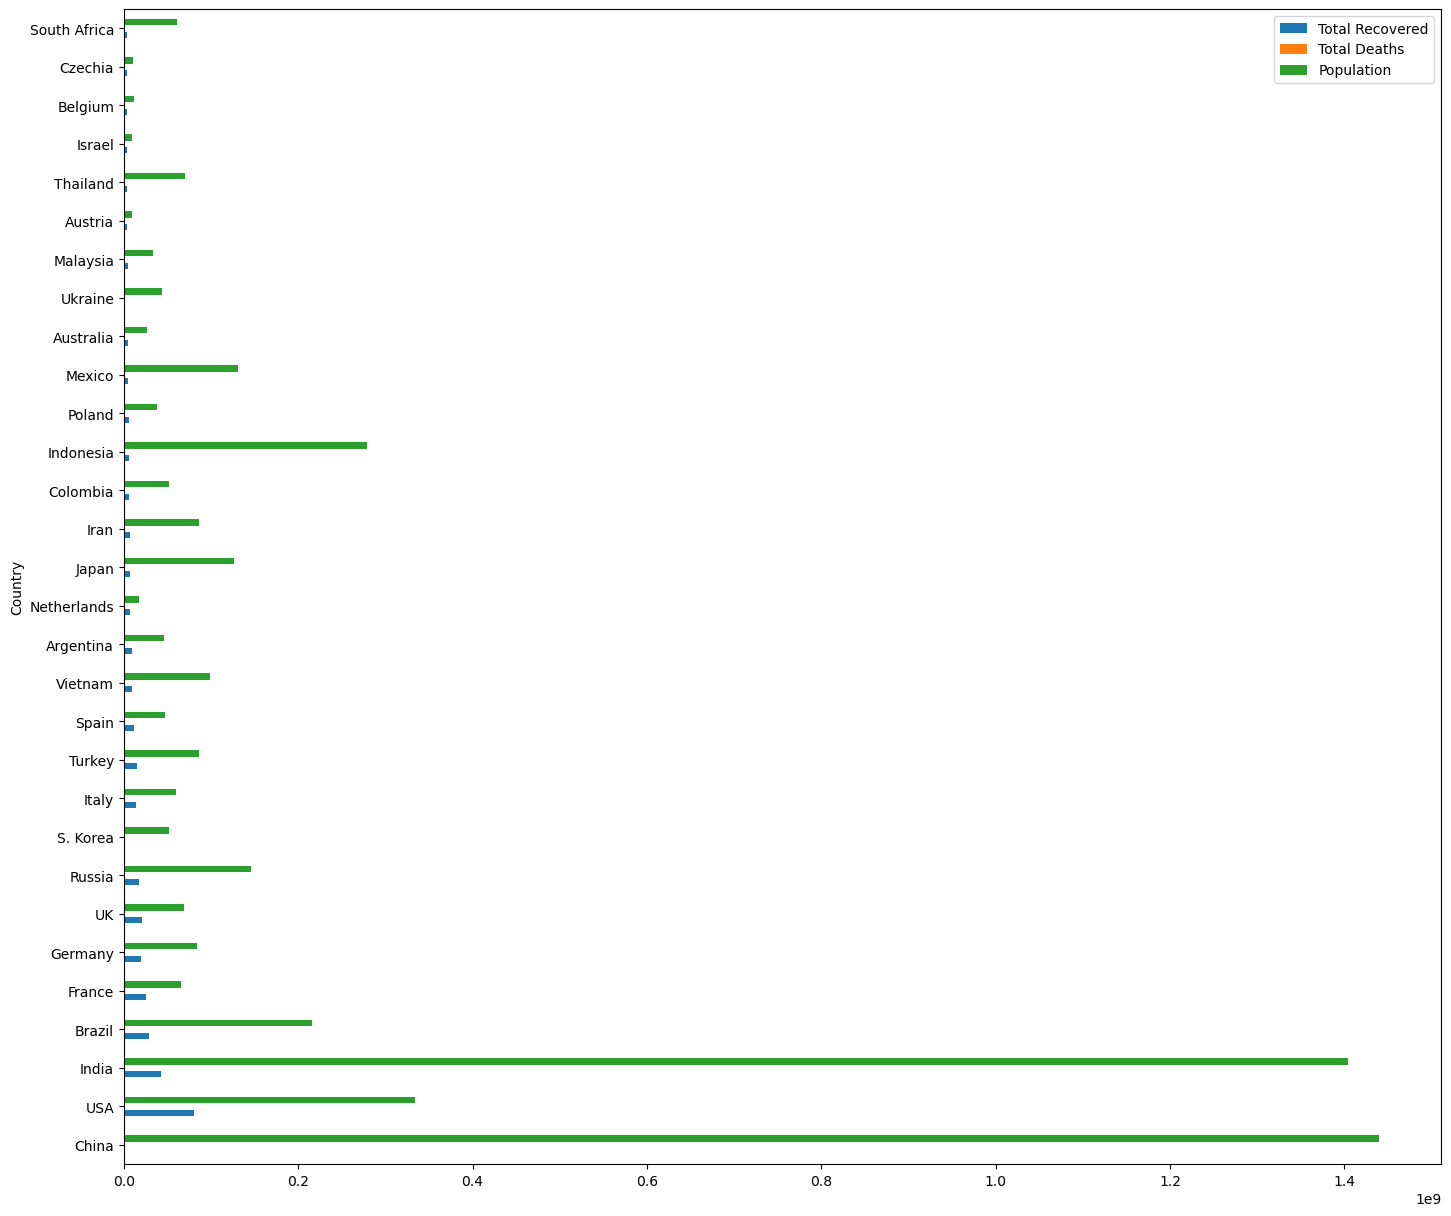

In [66]:
plt.style.use('default')

# bar group chart
df = data_df[['Country', 'Total Recovered', 'Total Deaths', 'Population']][:30].set_index('Country')
df.plot.barh(figsize=(17,15))

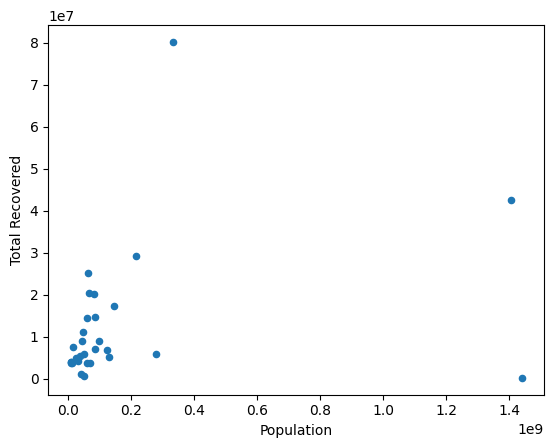

In [ ]:
df.plot.scatter(x='Population', y='Total Recovered')

### Active Cases ~ Total Deaths ~ Total Recovered

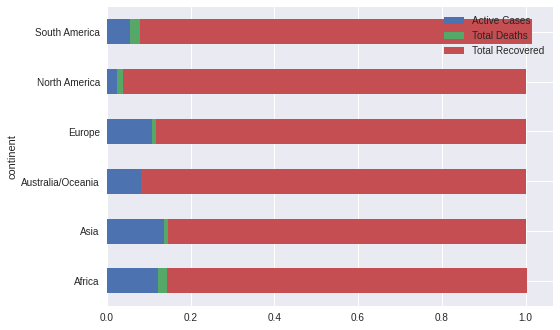

In [ ]:
df = data_df.groupby('continent')[['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']].sum()
df['Active Cases'] = df['Active Cases'] / df['Total Cases']
df['Total Deaths'] = df['Total Deaths'] / df['Total Cases']
df['Total Recovered'] = df['Total Recovered'] / df['Total Cases']
df.drop(columns=['Total Cases'], inplace=True)
df.plot.barh(stacked=True);

Nhận xét: `Total Cases` cấu thành từ 3 phần: `Active Cases`, `Total Deaths` (chiếm ít nhất) & `Total Recovered` (chiếm nhiều nhất)

### `Total Cases` ~ (`Active Cases`, `Total Deaths`, `Total Recovered`)

- Ref: https://pbpython.com/waterfall-chart.html

In [ ]:
world_18 = data_df[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
world_25 = df_25[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()

In [ ]:
df = world_18[['Total Cases']]
df = pd.concat([df,
                world_25[['Active Cases']] - world_18[['Active Cases']],
                world_25[['Total Deaths']] - world_18[['Total Deaths']],
                world_25[['Total Recovered']] - world_18[['Total Recovered']]])
df = pd.DataFrame(df, columns=['amount'])
df.rename({'Total Cases':'Total Cases (18/4)'}, inplace=True)
df

,amount
Total Cases (18/4),505262739.0
Active Cases,-1852229.0
Total Deaths,19760.0
Total Recovered,6517117.0


In [ ]:
blank= df['amount'].cumsum().shift(1).fillna(0)
total = df.sum().amount

df.loc["Total Cases (25/4)"] = total
blank.loc["Total Cases (25/4)"] = total

In [ ]:
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan
# step

In [ ]:
#When plotting the last element, we want to show the full bar
blank.loc["Total Cases (25/4)"] = 0

<Figure size 1080x576 with 0 Axes>

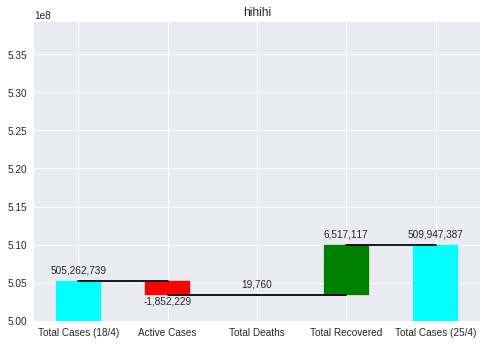

In [ ]:
plt.figure(figsize=(15,8))
ax = df.plot(kind='bar', stacked=True, bottom=blank, legend=None, title="Total Cases Progress", rot=0)
ax.plot(step.index, step.values, 'k')
# ax.set_ylim(bottom= 5.02 * 1e8);

y_height = df.amount.cumsum().shift(1).fillna(0)
max = df.max()
neg_offset = max / 400
pos_offset = max / 500
plot_offset = int(max / 15)
loop = 0
for index, row in df.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    ax.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
ax.set_ylim(5 * 1e8, blank.max()+int(plot_offset));   

ax.get_children()[1].set_color('red')
ax.get_children()[0].set_color('cyan')
ax.get_children()[4].set_color('cyan')
ax.get_children()[3].set_color('green')

Nhận xét: ...

### Coi kỹ từng quan hệ giữa các cặp thuộc tính ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']


<Figure size 1080x720 with 0 Axes>

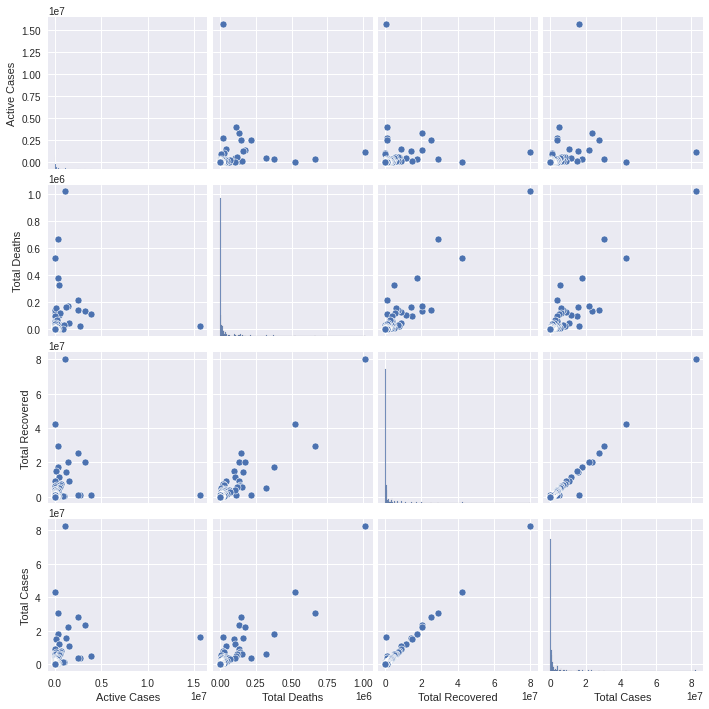

In [ ]:
plt.figure(figsize=(15,10))
cols = ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']
sns.pairplot(data_df[cols],kind='scatter');

Nhận xét: `Total Recovered` & `Total Cases` có quan hệ tuyến tính. Ta sẽ xem thử có mối quan hệ nhân quả giữa 2 trường này trong mục 3

- 1 cách tổng quan, ta sẽ vẽ scatter plot cho toàn bộ các trường dữ liệu

In [ ]:
df_calculate = data_df[data_df.columns[1:]]
sns.pairplot(df_calculate,kind='scatter')
plt.show()

Nhận xét: ...

### Active Cases & Total Recovered

### New Deaths & Another
Tìm mối liên hệ giữa `New Deaths` và các thuộc tính khác có trong Table.<br>
Chúng ta chỉ xét trên châu lục **Europe**

In [7]:
week_df.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious',
       'Total Tests', 'Population', 'continent', 'day'],
      dtype='object')

In [10]:
df = week_df[week_df['continent'] == 'Europe'].groupby('day')[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases', 'Serious']].sum()
df = df.reset_index()

df.head()

,day,New Cases,New Deaths,New Recovered,Active Cases,Serious
0,18-04-2022,120322.0,693.0,730283.0,20236336.0,9212.0
1,19-04-2022,267488.0,1137.0,891529.0,19607425.0,9203.0
2,20-04-2022,518969.0,1854.0,742427.0,19406118.0,9151.0
3,21-04-2022,479519.0,2056.0,661646.0,19280309.0,9236.0
4,22-04-2022,350697.0,1324.0,644939.0,18979043.0,9170.0


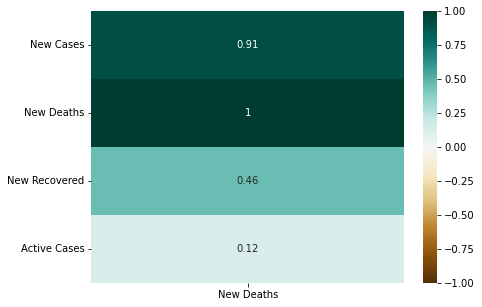

In [43]:
corrs = df[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases']].corr()[['New Deaths']]

plt.figure(figsize=(7, 5))
sns.heatmap(data=corrs, cmap='BrBG', annot=True, vmax=1, vmin=-1);

Ta thấy răng giữa `New Cases` và `New Deaths` có tương quan nhiều với nhau.<br>

Xem xét trên góc nhìn hơn giữa cặp thuộc tính này:

- Scatter plot

In [21]:
dc_df = df[['New Cases', 'New Deaths', 'day']]
dc_df.head()

,New Cases,New Deaths,day
0,120322.0,693.0,18-04-2022
1,267488.0,1137.0,19-04-2022
2,518969.0,1854.0,20-04-2022
3,479519.0,2056.0,21-04-2022
4,350697.0,1324.0,22-04-2022


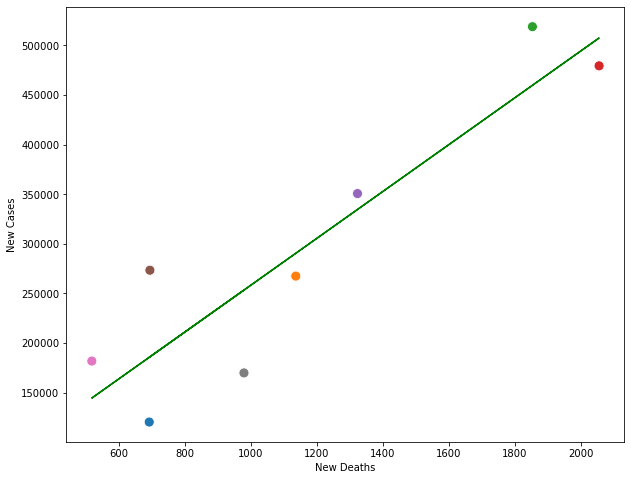

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='New Deaths', y='New Cases', hue='day', data=dc_df, legend=False, s=100);
x = dc_df['New Deaths'].values
y = dc_df['New Cases'].values

m, b = np.polyfit(x, y, 1)

plt.plot(x, x*m + b, c='green');

Nhận xét: ...

## 3. Quan hệ nhân quả

In [ ]:
# corr = df.corr()

# mask = np.zeros_like(corr,dtype=bool)
# mask[np.triu_indices_from(mask)] = True

# f,ax = plt.subplots(figsize=(20,15))

# cmap = sns.diverging_palette(220,10,as_cmap=True)

# sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5})

# plt.show()

Tính tương quan giữa các cột. Có thể thấy gần như các trường dữ liệu đều tỉ lệ thuận với nhau. Trường dữ liệu Total Cases ảnh hưởng rõ ràng nhất đối với các trường dữ liệu khác. Các cặp trường dữ liệu có ảnh hưởng nổi bật nhất là (Total Death,Total Case) (Total Death, Total Serious) ( Total Recovered, Active Case)( Total ReCovered, Total Tests)

In [ ]:
# nháp
###
# plt.figure(figsize=(19,17))
# for i in range(len(num_cols)):
#     plt.subplot(3,4,i+1)
#     plt.boxplot(df[num_cols[i]])
#     plt.title(num_cols[i])